![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 3 - Discriminative Classification </center>
### <center> Training a linear classifier (using gradient descent)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/03_DiscriminativeClassfication/MainTrainLinearClassifier.ipynb)

In [1]:
#-- Wide layout:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 16
np.random.seed(1)

### Load moons data:

In [3]:
from sklearn.datasets import make_moons

N      = 500
mX, vY = make_moons(n_samples=N, noise=.1)

mX.shape, vY.shape

((500, 2), (500,))

In [4]:
vY[vY == 0] = -1
vY

array([ 1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
        1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1

### Plot the data:

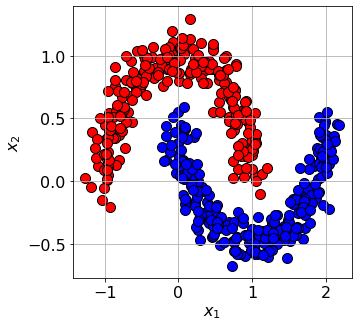

In [5]:
plt.figure(figsize=(5, 5)), plt.grid(True)
plt.scatter(mX[vY==-1,0], mX[vY==-1,1], color='r', s=100, edgecolor='k')
plt.scatter(mX[vY==1,0],  mX[vY==1,1],  color='b', s=100, edgecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

#### Define:
$$\tilde{\boldsymbol{X}}=\left[\begin{matrix}-1 & - & x_{1} & -\\
-1 & - & x_{2} & -\\
 & \vdots\\
-1 & - & x_{N} & -
\end{matrix}\right]\in\mathbb{R}^{N\times3}$$

In [6]:
mTildeX = np.c_[-np.ones((N, 1)), mX]
mTildeX.shape, mTildeX

((500, 3),
 array([[-1.        ,  0.31655568, -0.04942182],
        [-1.        ,  0.7408827 , -0.48128624],
        [-1.        ,  0.87172637,  0.56656159],
        ...,
        [-1.        ,  1.28777472, -0.45156989],
        [-1.        , -0.97664836,  0.21340588],
        [-1.        ,  0.96741797,  0.48786357]]))

#### Sigmoid:
$$\sigma\left(\alpha\right)=2\frac{\exp\left(\alpha\right)}{1+\exp\left(\alpha\right)}-1$$
#### Sigmoid derivative:
$$\frac{\text{d}\sigma\left(\alpha\right)}{\text{d}\alpha}=2\frac{\exp\left(\alpha\right)}{\left(1+\exp\left(\alpha\right)\right)^{2}}$$
#### Loss:
$$\arg\min_{\tilde{\boldsymbol{w}}}J\left(\tilde{\boldsymbol{w}}\right)=\arg\min_{\tilde{\boldsymbol{w}}}\left\Vert \sigma\left(\tilde{\boldsymbol{X}}\tilde{\boldsymbol{w}}\right)-\boldsymbol{y}\right\Vert _{2}^{2}$$
#### Loss gradient:
$$\nabla_{\tilde{\boldsymbol{w}}}J\left(\tilde{\boldsymbol{w}}\right)=\frac{2}{N}\tilde{\boldsymbol{X}}^{T}\sigma'\left(\text{diag}\left(\tilde{\boldsymbol{X}}\tilde{\boldsymbol{w}}\right)\right)\left(\sigma\left(\tilde{\boldsymbol{X}}\tilde{\boldsymbol{w}}\right)-\boldsymbol{y}\right)$$

In [7]:
def sigmoid(α):
    return 2 * np.exp(α) / (np.exp(α) + 1) - 1

def Dsigmoid(α):
    return 2 * np.exp(α) / (np.exp(α) + 1)**2

def Loss(vTildeW):
    return np.linalg.norm(sigmoid(mTildeX @ vTildeW) - vY[:,None])**2 / (4*N)

def ComputeGradient(vTildeW):
    return 2 * (mTildeX.T * Dsigmoid(mTildeX @ vTildeW).T) @ (sigmoid(mTildeX @ vTildeW) - vY[:,None]) / N

__Plot funciton:__

In [8]:
def PlotW(vTildeW, fig):
    b     = vTildeW[0].squeeze()
    vW    = vTildeW[1:].squeeze()
    vIdx1 = (mX @ vW - b) < 0
    vHatY = np.sign(mX @ vW - b)
    
    vLoss.append(Loss(vTildeW))
    vError.append(np.mean(vHatY != vY))
    
    ax1 = fig.axes[0]
    ax2 = fig.axes[1]
    if fig.axes:
        ax1.cla()
        ax2.cla()
    ax1.grid(True)
    ax1.axvline(x=0, c='k')
    ax1.axhline(y=0, c='k')
    ax1.axis([-1.9, 2.5, -2.2, 2.2])
    ax1.set_title(r'$f_{{w},b}\left({x}\right)={sign}\left({w}^{T}{x}-b\right)$')
    ax1.set_xlabel('$x_1$')
    ax1.set_ylabel('$x_2$')
    v = np.array([-3, 3])
    ax1.scatter(mX[vIdx1,0],  mX[vIdx1,1],  color='r', s=100, edgecolor='k')
    ax1.scatter(mX[~vIdx1,0], mX[~vIdx1,1], color='b', s=100, edgecolor='k')
    ax1.plot(v, (b - vW[0] * v) / vW[1],    color='k', lw=2)
    ax1.arrow(0, 0, vW[0], vW[1], color='orange', width=.05)
    
    ax2.plot(vError, 'k', lw=2, label='error rate')
    ax2.plot(vLoss,  'm', lw=2, label='loss')
    ax2.set_xlabel('iterations')
    ax2.grid()
    ax2.legend()
    
    
    fig.canvas.draw()
#     plt.pause(1/2)
    plt.pause(1e-6)

#### Apply gradient descent:
$$\tilde{\boldsymbol{w}}_{k+1}=\tilde{\boldsymbol{w}}_{k}-\mu\nabla_{\tilde{\boldsymbol{w}}}\boldsymbol{J}\left(\tilde{\boldsymbol{w}}_{k}\right)$$

<IPython.core.display.Javascript object>


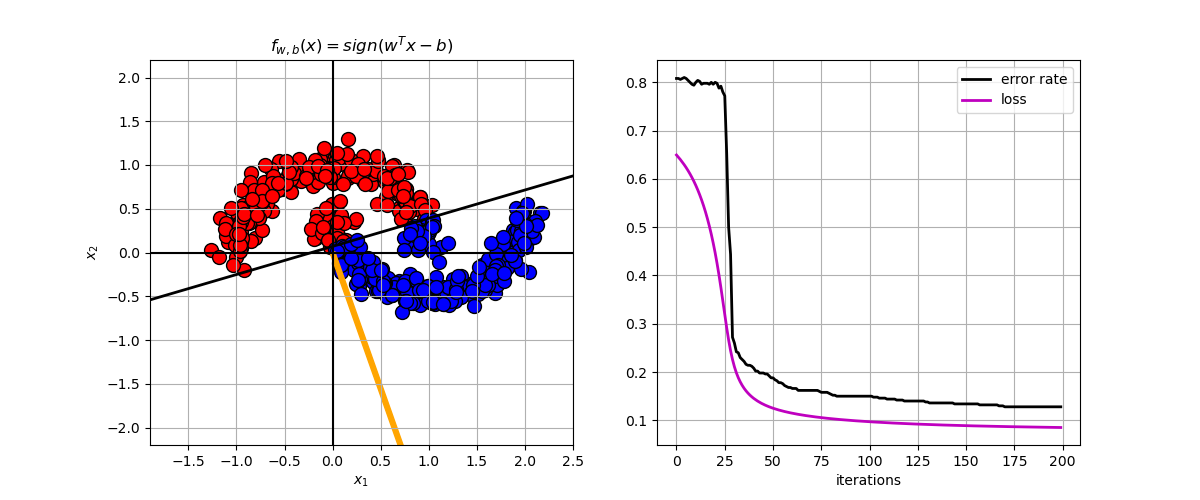

In [9]:
%matplotlib notebook

vLoss  = []
vError = []

#-- Some init vector w:
vTildeW = np.random.randn(3, 1)
# vTildeW = np.zeros((3, 1))
vTildeW = np.array([[0,-2.0,2]]).T

#-- Apply gradient descent:
K       = 200
µ       = .2
fig, _  = plt.subplots(1, 2, figsize=(12, 5))
for ii in range(K):
    #-- Gradient descent step:
    vTildeW -= µ * ComputeGradient(vTildeW)
    
    
    #-- Plot:
    PlotW(vTildeW, fig)    
    
plt.show()

### Exercise
Find the best step size $\mu$  
(so the algorithm will converge in minimal number of iterations)